## EDA General

### Eda datos raw

importamos librerias:

In [4]:
import warnings
warnings.filterwarnings("ignore")

from dotenv import load_dotenv
from scipy.stats import shapiro
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

In [5]:
df = pd.read_csv("../Data/df_tourist.csv", sep= ";")

Inspeccionamos DF

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6733 entries, 0 to 6732
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   apartment_id                 6733 non-null   int64 
 1   name                         6730 non-null   object
 2   description                  6706 non-null   object
 3   host_id                      6733 non-null   int64 
 4   neighbourhood_name           6733 non-null   object
 5   neighbourhood_district       4075 non-null   object
 6   room_type                    6733 non-null   object
 7   accommodates                 6733 non-null   int64 
 8   bathrooms                    6733 non-null   object
 9   bedrooms                     6733 non-null   object
 10  beds                         6733 non-null   object
 11  amenities_list               6717 non-null   object
 12  price                        6733 non-null   object
 13  minimum_nights               6733

In [7]:
df.describe().round(2)

,apartment_id,host_id,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews
count,6733.00,6.733000e+03,6733.00,6733.00,6733.00,6733.00,6733.00,6733.00,6733.00,6733.00
mean,15127170.44,6.242871e+07,4.35,4.42,756.98,12.29,27.42,44.30,187.39,34.17
std,7729288.27,5.754856e+07,2.63,10.78,498.75,11.54,22.48,33.11,130.16,60.21
min,11964.00,1.070400e+04,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,8699662.00,1.054730e+07,2.00,1.00,62.00,0.00,2.00,9.00,65.00,1.00
50%,16772799.00,4.302790e+07,4.00,2.00,1125.00,10.00,26.00,46.00,188.00,9.00
75%,21480621.00,1.066918e+08,6.00,4.00,1125.00,24.00,50.00,76.00,316.00,40.00
max,27245117.00,3.365242e+08,29.00,365.00,1125.00,30.00,60.00,90.00,365.00,588.00


#### Variabilidad/distribución variable precio:

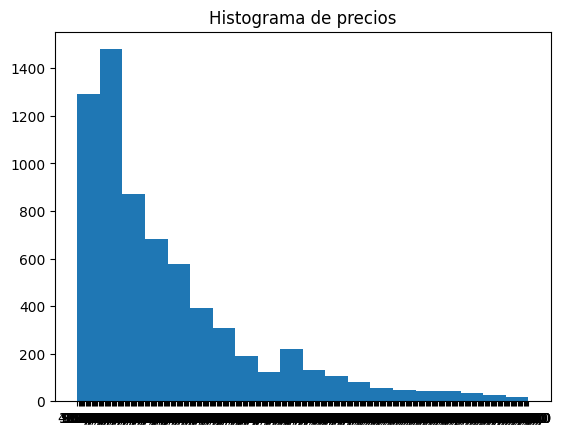

In [8]:
# Ajustamos la escala del eje Y para mostrar números completos ( sin notación cientifica por default)
plt.ticklabel_format(style='plain', axis='y')

plt.title('Histograma de precios')
plt.hist(df['price'], bins=20)
plt.show()

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

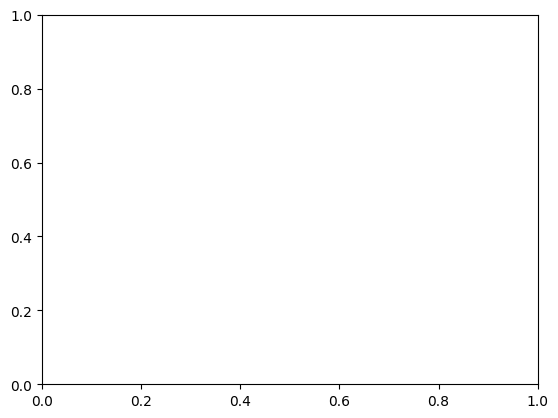

In [9]:
plt.boxplot(df['price'].dropna()) # quitamos los nan para evitar anomalias 
plt.ylim(0, 6000)  # Ajustamos los límites según los valores del dataset
plt.title('Boxplot de precios')
plt.show()



Identificación/tratamiento de Outliers:

In [ ]:
# Calcular el rango intercuartílico (IQR)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para considerar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el DataFrame para mantener solo los valores dentro de los límites
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

Volvemos a graficar la variable trás el tratamiento de los Outliers

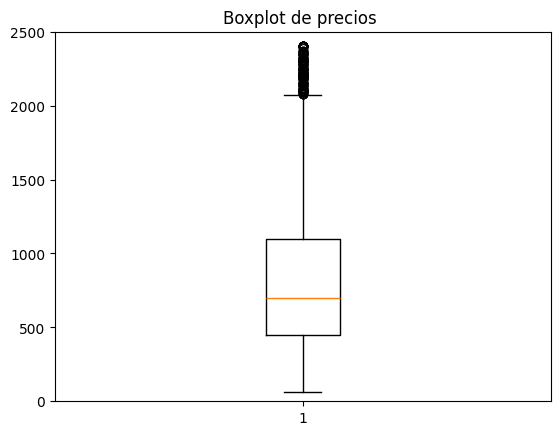

In [ ]:
plt.boxplot(df_filtered['price'].dropna()) # quitamos los nan para evitar anomalias 
plt.ylim(0, 2500)  # Ajustamos los límites según los valores del dataset
plt.title('Boxplot de precios ')
plt.show()

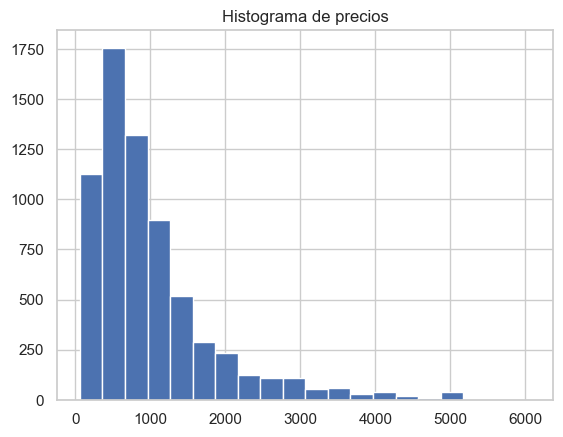

In [ ]:
# Ajustamos la escala del eje Y para mostrar números completos ( sin notación cientifica por default)
plt.ticklabel_format(style='plain', axis='y')

# Histograma 
plt.title('Histograma de precios')
plt.hist(df_filtered['price'], bins=20)
plt.show()

In [ ]:
df_filtered['price'].describe().round(2)

count    6361.00
mean      824.39
std       505.43
min        60.00
25%       450.00
50%       700.00
75%      1100.00
max      2400.00
Name: price, dtype: float64

In [ ]:
df['price'].var().round(2)

np.float64(715674.34)

Verificamos dispersión de la variable price

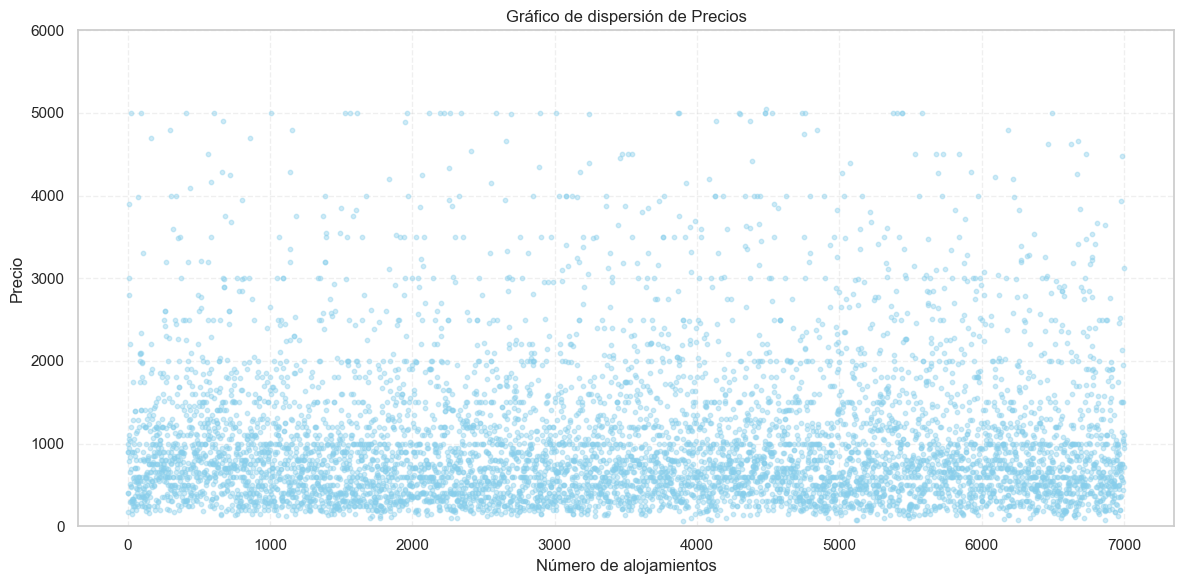

In [ ]:
# Eliminamos los NaN
price_nonan = df['price'].dropna()

plt.figure(figsize=(12, 6))
plt.scatter(price_nonan.index, price_nonan, alpha=0.4, color='skyblue', s=10)
plt.ylim(0, 6000)
plt.title('Gráfico de dispersión de Precios')
plt.xlabel('Número de alojamientos')
plt.ylabel('Precio')
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

#### Boxplot availability 

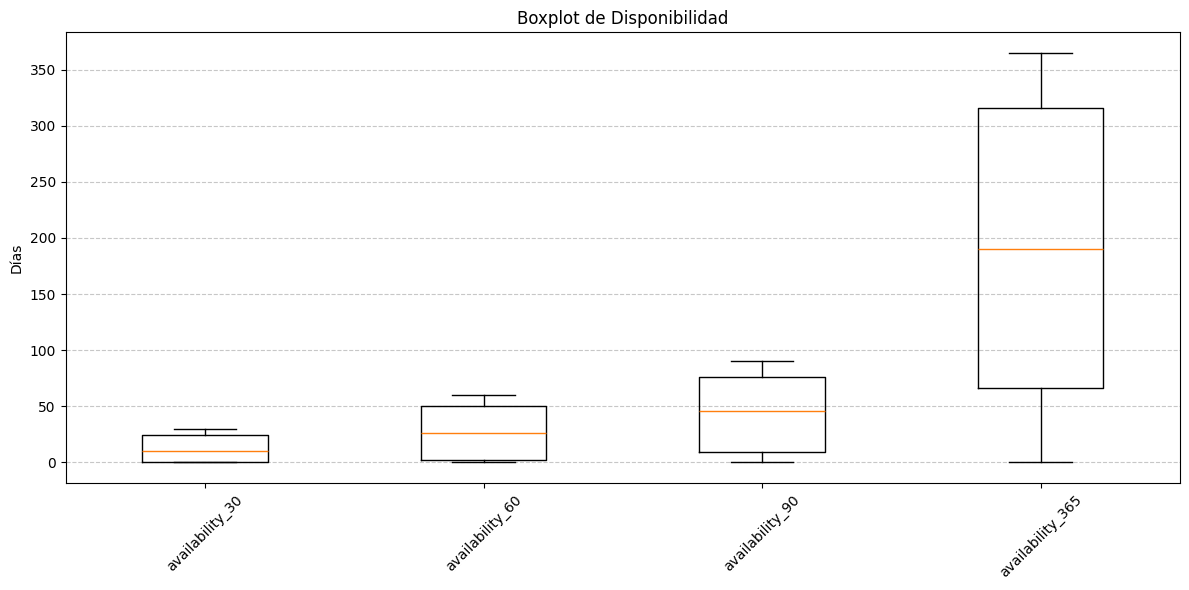

In [ ]:
# Lista de variables
variables = ['availability_30', 'availability_60', 'availability_90', 'availability_365']

# Crear el boxplot
plt.figure(figsize=(12, 6))
plt.boxplot([df[var].dropna() for var in variables], labels=variables)
plt.title('Boxplot de Disponibilidad')
plt.ylabel('Días')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### EDA sobre df_tourist 

In [ ]:
df_tourist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6733 entries, 0 to 6732
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   apartment_id                 6733 non-null   int64         
 1   name                         6730 non-null   object        
 2   description                  6706 non-null   object        
 3   host_id                      6733 non-null   int64         
 4   neighbourhood_name           6733 non-null   object        
 5   neighbourhood_district       4075 non-null   object        
 6   room_type                    6733 non-null   object        
 7   accommodates                 6733 non-null   int64         
 8   bathrooms                    6733 non-null   float64       
 9   bedrooms                     6733 non-null   float64       
 10  beds                         6733 non-null   float64       
 11  amenities_list               6717 non-null 

#### Boxplot bathrooms - bedrooms - beds - accommodates

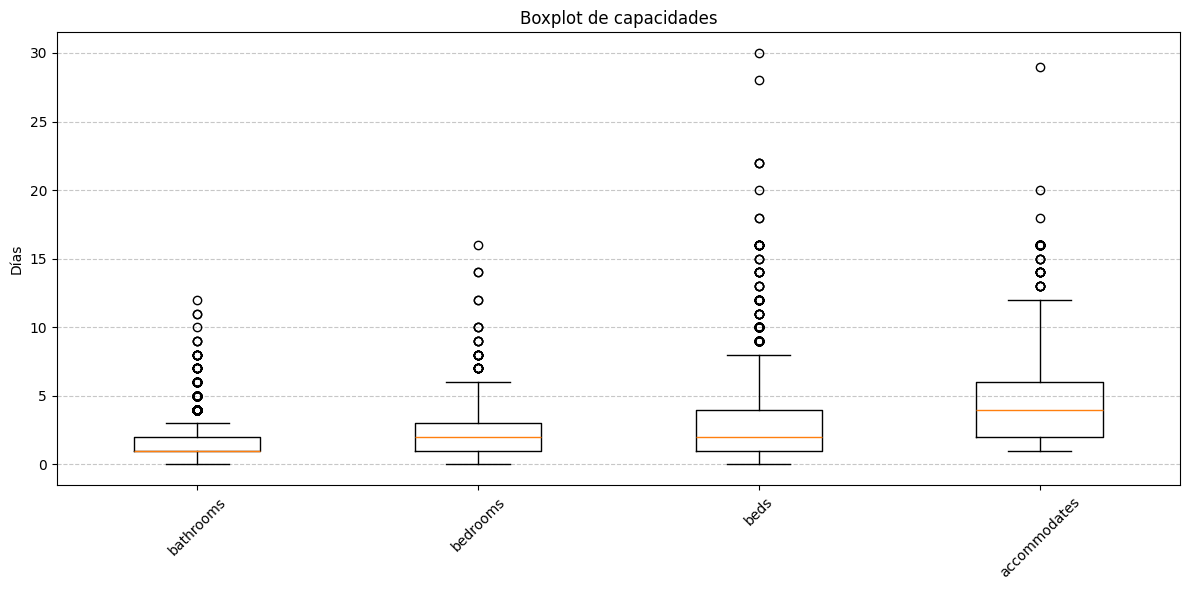

In [ ]:
# Lista de variables
variables = ['bathrooms', 'bedrooms', 'beds', 'accommodates']

# Crear el boxplot
plt.figure(figsize=(12, 6))
plt.boxplot([df_tourist[var].dropna() for var in variables], labels=variables)
plt.title('Boxplot de capacidades')
plt.ylabel('Días')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Exploración de relaciones entre variables 

Verificamos tipo de distribución de las variables price/accommodates/beds/bedrooms mediante Shapiro Wilk test

In [ ]:
# Prueba de normalidad para cada variable
stat_price, p_price = shapiro(df_tourist['price'])
stat_accom, p_accom = shapiro(df_tourist['accommodates'])
stat_beds, p_beds = shapiro(df_tourist['beds'])
stat_bedrooms, p_bedrooms = shapiro(df_tourist['bedrooms'])

# Resultados
print(f"Shapiro-Wilk Test para 'price': Estadístico={stat_price:.4f}, p-valor={p_price:.4f}")
print(f"Shapiro-Wilk Test para 'accommodates': Estadístico={stat_accom:.4f}, p-valor={p_accom:.4f}")
print(f"Shapiro-Wilk Test para 'beds': Estadístico={stat_beds:.4f}, p-valor={p_beds:.4f}")
print(f"Shapiro-Wilk Test para 'bedrooms': Estadístico={stat_bedrooms:.4f}, p-valor={p_bedrooms:.4f}")

# Interpretación
alpha = 0.05

def interpret_shapiro(p_value, variable_name):
    if p_value > alpha:
        print(f"La variable '{variable_name}' sigue una distribución normal (p > 0.05)")
    else:
        print(f"La variable '{variable_name}' NO sigue una distribución normal (p <= 0.05)")

interpret_shapiro(p_price, 'price')
interpret_shapiro(p_accom, 'accommodates')
interpret_shapiro(p_beds, 'beds')
interpret_shapiro(p_bedrooms, 'bedrooms')

Shapiro-Wilk Test para 'price': Estadístico=0.7935, p-valor=0.0000
Shapiro-Wilk Test para 'accommodates': Estadístico=0.8877, p-valor=0.0000
Shapiro-Wilk Test para 'beds': Estadístico=0.8044, p-valor=0.0000
Shapiro-Wilk Test para 'bedrooms': Estadístico=0.8110, p-valor=0.0000
La variable 'price' NO sigue una distribución normal (p <= 0.05)
La variable 'accommodates' NO sigue una distribución normal (p <= 0.05)
La variable 'beds' NO sigue una distribución normal (p <= 0.05)
La variable 'bedrooms' NO sigue una distribución normal (p <= 0.05)


verificamos coeficiente de correlación de Spearman:

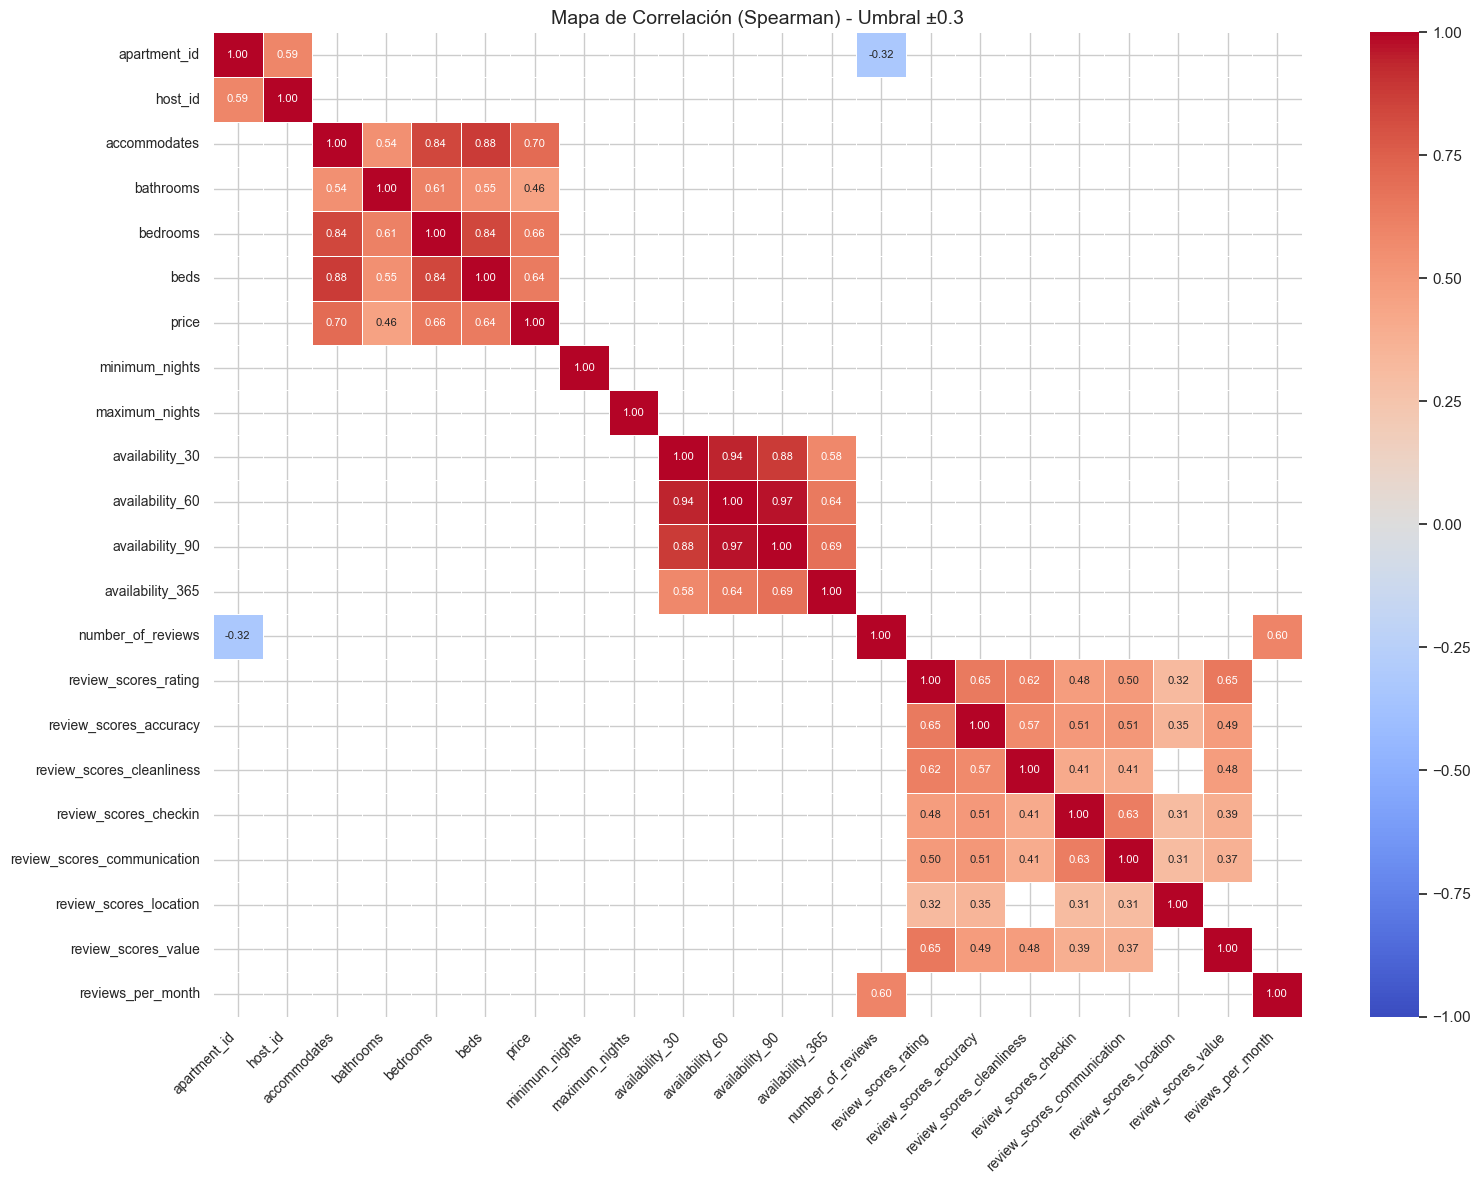

In [ ]:
# Seleccionar solo las columnas numéricas
numericas = df_tourist.select_dtypes(include=['float64', 'int64'])

# Verificar si hay nulos
numericas = numericas.dropna()

# Umbral
threshold = 0.3

# Matriz de correlación utilizando Spearman
corr_spearman = numericas.corr(method='spearman')

# Aplicamos el umbral: valores menores al umbral se establecen en NaN
corr_spearman_masked = corr_spearman.mask((corr_spearman < threshold) & (corr_spearman > -threshold))

# Tamaño del gráfico
plt.figure(figsize=(16, 12))

# Heatmap ajustado
sns.heatmap(
    corr_spearman_masked, 
    annot=True, 
    cmap='coolwarm', 
    vmin=-1, 
    vmax=1, 
    cbar=True, 
    annot_kws={"size": 8},  # Tamaño del texto
    fmt=".2f",
    mask=corr_spearman_masked.isnull(),  # quitamos los valores no significativos
    linewidths=0.5  # Línea entre celdas para mejorar visibilidad
)

plt.title('Mapa de Correlación (Spearman) - Umbral ±0.3', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

En los gráficos a continuación  muestra la relación entre el **precio** y la **capacidad de alojamiento**/**numero de camas**/**numero de baños** de las propiedades, usando un ajuste de regresión polinómica de segundo orden. Además, se segmenta por **tipo de habitación** para entender cómo varía el precio en función del tipo de alojamiento.

Relación entre Precio y Capacidad alojamiento

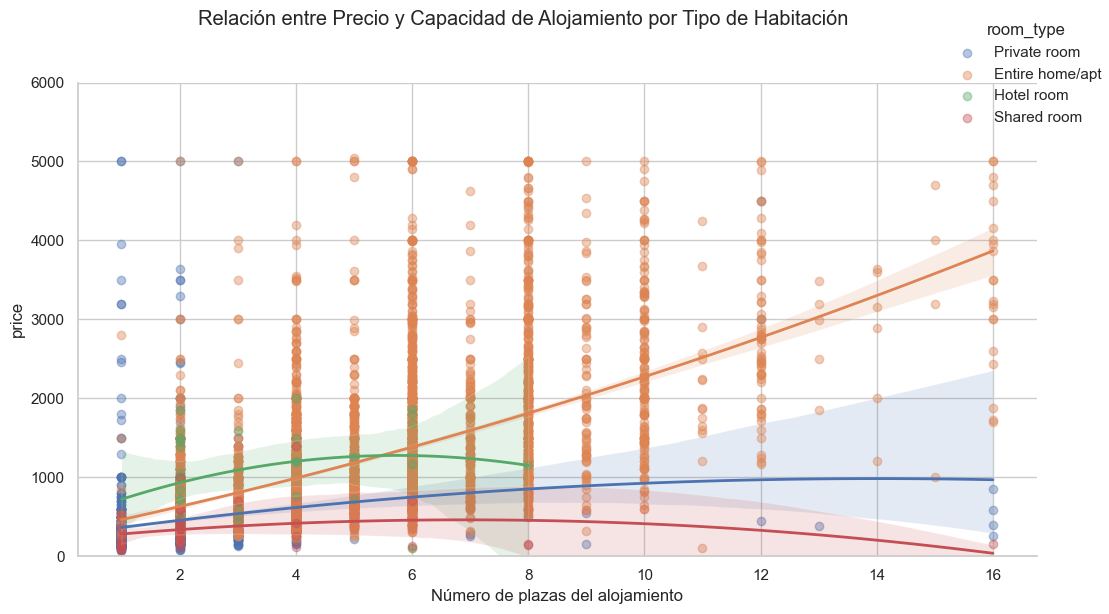

In [ ]:
# Incluir 'room_type' en el DataFrame filtrado
df_filtered = df[['price', 'accommodates', 'room_type']]

# Crear el gráfico
g = sns.lmplot(
    x='accommodates',
    y='price',
    data=df_filtered,
    hue='room_type',
    order=2,  
    height=6,
    aspect=1.5,
    scatter_kws={'alpha': 0.4},
    line_kws={'linewidth': 2}
)

# Ajustar límites del eje Y
plt.ylim(0, 6000)

# Mover la leyenda hacia la derecha y un poco más arriba
g._legend.set_bbox_to_anchor((1.05, 0.9))  # Mover más arriba

# Ajustar el título del gráfico
plt.subplots_adjust(top=0.9)  # Espacio superior
plt.suptitle('Relación entre Precio y Capacidad de Alojamiento por Tipo de Habitación', y=1.02)
plt.xlabel('Número de plazas del alojamiento')

plt.tight_layout()
plt.show()


Relación entre Precio y Número de Camas

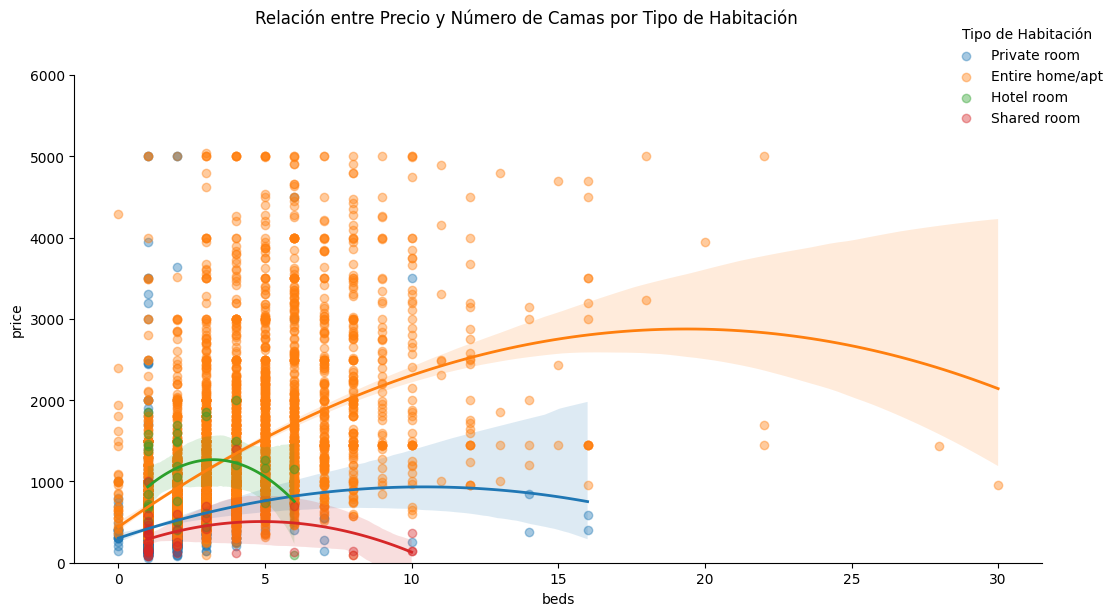

In [ ]:
# Incluir 'room_type' en el DataFrame filtrado
df_filtered = df_tourist[['beds', 'price', 'room_type']].dropna()

import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico con ajuste polinómico
g = sns.lmplot(
    x='beds',
    y='price',
    data=df_filtered,
    hue='room_type',
    order=2,  
    height=6,
    aspect=1.5,
    scatter_kws={'alpha': 0.4},
    line_kws={'linewidth': 2}
)

# Ajustar límites del eje Y
plt.ylim(0, 6000)

# Mover la leyenda hacia la derecha y un poco más arriba
g._legend.set_bbox_to_anchor((1.05, 0.9))  # Mover más arriba
g._legend.set_title('Tipo de Habitación')

# Ajustar el título del gráfico
plt.subplots_adjust(top=0.9)
plt.suptitle('Relación entre Precio y Número de Camas por Tipo de Habitación', y=1.02)

plt.tight_layout()
plt.show()


Relación entre Precio y Número de Dormitorios

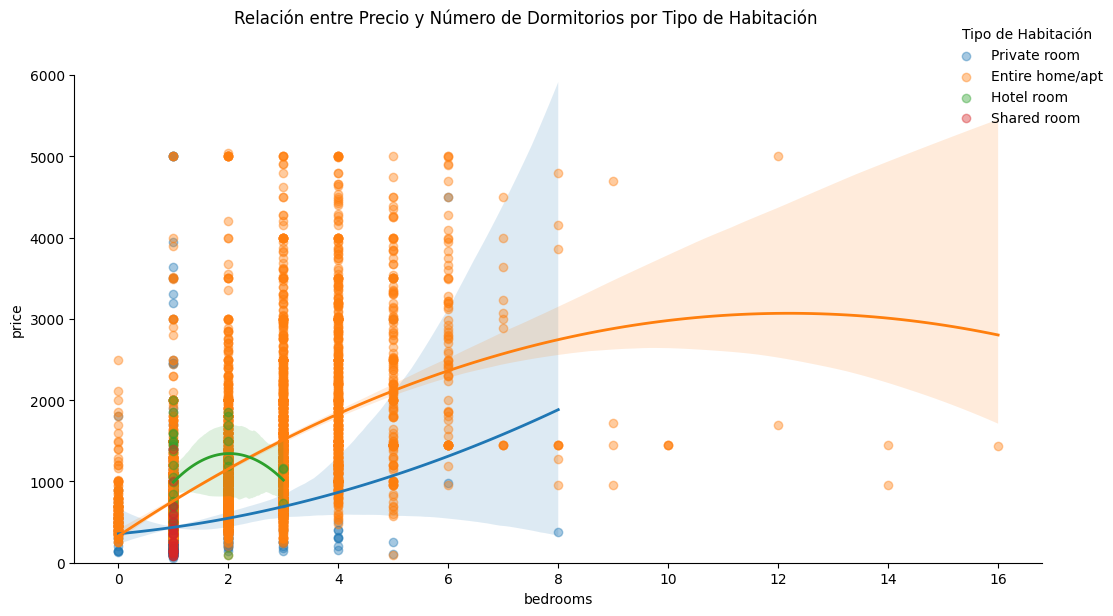

In [ ]:
# Incluir 'room_type' en el DataFrame filtrado
df_filtered = df_tourist[['bedrooms', 'price', 'room_type']]

# Crear el gráfico con ajuste polinómico
g = sns.lmplot(
    x='bedrooms',
    y='price',
    data=df_filtered,
    hue='room_type',
    order=2,  
    height=6,
    aspect=1.5,
    scatter_kws={'alpha': 0.4},
    line_kws={'linewidth': 2}
)

# Ajustar límites del eje Y
plt.ylim(0, 6000)

# Mover la leyenda hacia la derecha y un poco más arriba
g._legend.set_bbox_to_anchor((1.05, 0.9))
g._legend.set_title('Tipo de Habitación')

# Ajustar el título del gráfico
plt.subplots_adjust(top=0.9)
plt.suptitle('Relación entre Precio y Número de Dormitorios por Tipo de Habitación', y=1.02)

plt.tight_layout()
plt.show()

Distribución del precio por capacidad

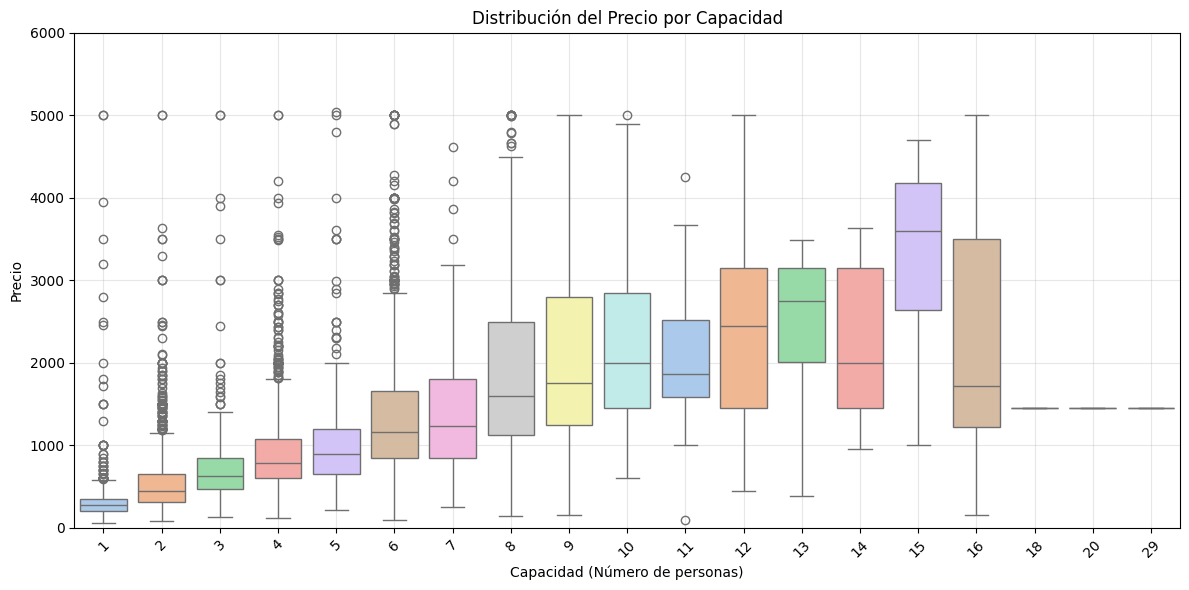

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_tourist, x='accommodates', y='price', palette='pastel')
plt.title('Distribución del Precio por Capacidad')
plt.xlabel('Capacidad (Número de personas)')
plt.ylabel('Precio')
plt.ylim(0, 6000)  # Ajustar según los valores del dataset
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Creación df_usuario con las variables que nos interesan

In [ ]:
# Seleccion de variables necesarias para el departamento de experiancia al usuario:
df_usuario = df_tourist[['apartment_id','city','room_type','price','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                                    'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','is_instant_bookable','reviews_per_month']]

# df usuario
df_usuario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6733 entries, 0 to 6732
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 6733 non-null   int64  
 1   city                         6733 non-null   object 
 2   room_type                    6733 non-null   object 
 3   price                        6733 non-null   float64
 4   review_scores_rating         6733 non-null   float64
 5   review_scores_accuracy       6733 non-null   float64
 6   review_scores_cleanliness    6733 non-null   float64
 7   review_scores_checkin        6733 non-null   float64
 8   review_scores_communication  6733 non-null   float64
 9   review_scores_location       6733 non-null   float64
 10  review_scores_value          6733 non-null   float64
 11  is_instant_bookable          6733 non-null   object 
 12  reviews_per_month            6733 non-null   float64
dtypes: float64(9), int

In [ ]:
#1- indice_satisfaccion
indice_satisfaccion = df_tourist['review_scores_rating'].sum() / df_tourist['apartment_id'].nunique()
print("Índice de satisfacción general:", round(indice_satisfaccion, 2))

#2 max(avg_scores)
columnas = ['review_scores_accuracy', 'review_scores_cleanliness',
            'review_scores_checkin', 'review_scores_communication',
            'review_scores_location']

avg_scores = df_tourist[columnas].mean().sort_values(ascending=False)
print("Ítem con mayor satisfacción promedio:")
print(avg_scores.round(2))

Índice de satisfacción general: 92.4
Ítem con mayor satisfacción promedio:
review_scores_communication    97.11
review_scores_checkin          96.99
review_scores_location         96.18
review_scores_accuracy         95.34
review_scores_cleanliness      93.89
dtype: float64


In [ ]:
# Promedio de la puntuación de los usuarios en cada ciudad
mean_rating_per_city = df_tourist.groupby('city')['review_scores_rating'].mean()
round(mean_rating_per_city,2)

city
barcelona    90.93
girona       92.01
madrid       93.06
malaga       92.21
mallorca     94.12
menorca      93.73
sevilla      93.88
valencia     92.31
Name: review_scores_rating, dtype: float64

In [ ]:
# Promedio de la puntuación por los usuarios en cada ciudad
mean_rating_per_city = df_tourist.groupby('city')['review_scores_rating'].mean()
pd.DataFrame(mean_rating_per_city.round(2))

,review_scores_rating
city,
barcelona,90.93
girona,92.01
madrid,93.06
malaga,92.21
mallorca,94.12
menorca,93.73
sevilla,93.88
valencia,92.31


In [ ]:
#Porcentaje de alojamientos con una puntuación superior a 80 en cada ciudad
high_rating = df_tourist [df_tourist ['review_scores_rating'] > 80]
percent_high_rating = high_rating.groupby('city').size() / df.groupby('city').size() * 100
percent_high_rating = percent_high_rating.reset_index(name='percent_above_80')
percent_high_rating.round(2)

,city,percent_above_80
0,barcelona,85.90
1,girona,85.87
2,madrid,90.32
3,malaga,88.86
4,mallorca,89.34
5,menorca,92.20
6,sevilla,91.97
7,valencia,89.58


In [ ]:
# Procentaje alojamientos por ciudad y tipo de habitación
high_rating = df_tourist[df_tourist ['review_scores_rating'] > 80]
percent_high_rating = high_rating.groupby(['city','room_type']).size() / df_usuario.groupby(['city','room_type']).size() * 100
percent_high_rating = percent_high_rating.reset_index(name='percent_above_80')

round(percent_high_rating,2)

,city,room_type,percent_above_80
0,barcelona,Entire home/apt,87.05
1,barcelona,Hotel room,100.00
2,barcelona,Private room,91.65
3,barcelona,Shared room,88.89
4,girona,Entire home/apt,89.21
5,girona,Hotel room,50.00
6,girona,Private room,88.46
7,madrid,Entire home/apt,93.78
8,madrid,Hotel room,100.00
9,madrid,Private room,92.84


In [ ]:
#Comparación de la satisfacción según el tipo de alojamiento (room_type)
room_rating = df_tourist.groupby('room_type')['review_scores_rating'].mean().reset_index()
room_rating.sort_values(by='review_scores_rating', ascending=False).round(2)

,room_type,review_scores_rating
0,Entire home/apt,92.47
2,Private room,92.27
3,Shared room,91.64
1,Hotel room,90.30


In [ ]:
#Relación entre el tipo de alojamiento y la puntuación de satisfacción
df_tourist[['city', 'number_of_reviews']].groupby('city').sum().sort_values(by='number_of_reviews', ascending=False)

,number_of_reviews
city,
barcelona,80847
madrid,63566
sevilla,24170
mallorca,15756
valencia,15630
malaga,14898
girona,13597
menorca,1626


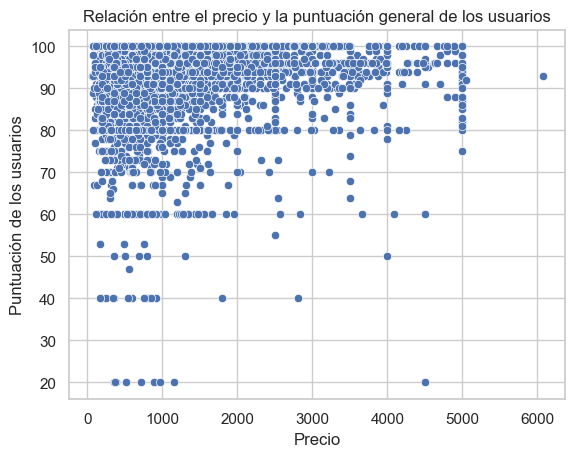

Coeficiente de correlación entre el precio y la puntuación de los usuarios: 0.04


In [ ]:
#Relación entre el precio y la puntuación general de los usuarios
sns.scatterplot(data=df_tourist, x='price', y='review_scores_rating')
plt.title('Relación entre el precio y la puntuación general de los usuarios')
plt.xlabel('Precio')
plt.ylabel('Puntuación de los usuarios')
plt.show()

#correlation_price_rating
correlation_price_rating = df[['price', 'review_scores_rating']].corr().iloc[0, 1]
print(f"Coeficiente de correlación entre el precio y la puntuación de los usuarios: {round(correlation_price_rating, 2)}")

## Análisis orientado a negocio (Operaciones)

### Crear dataset Operaciones

In [ ]:
df_op = df_tourist[['apartment_id','host_id','country','city','neighbourhood_name','neighbourhood_district','accommodates','room_type','description','amenities_list',
                    'beds','bedrooms','bathrooms','minimum_nights','maximum_nights','is_instant_bookable','availability_30','availability_60','availability_90','availability_365','price','insert_date']]

df_op

,apartment_id,host_id,country,city,neighbourhood_name,neighbourhood_district,accommodates,room_type,description,amenities_list,...,bathrooms,minimum_nights,maximum_nights,is_instant_bookable,availability_30,availability_60,availability_90,availability_365,price,insert_date
0,11964,45553,spain,malaga,Centro,None,2,Private room,Private bedroom in our attic apartment. Right ...,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",...,2.0,3,365,FALSO,7,20,40,130,400.0,2018-07-31
1,21853,83531,spain,madrid,C�rmenes,Latina,1,Private room,We have a quiet and sunny room with a good vie...,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",...,1.0,4,40,FALSO,0,0,0,162,170.0,2020-01-10
2,32347,139939,spain,sevilla,San Vicente,Casco Antiguo,4,Entire home/apt,Open French doors and step onto a plant-filled...,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",...,1.0,2,120,VERDADERO,26,31,31,270,990.0,2019-07-29
3,35379,152232,spain,barcelona,l'Antiga Esquerra de l'Eixample,Eixample,2,Private room,Room at a my apartment. Kitchen and 2 bathroom...,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",...,2.0,2,730,VERDADERO,9,23,49,300,400.0,2020-01-10
4,35801,153805,spain,girona,Quart,None,5,Private room,Lay in bed & watch sunlight change the mood of...,"Wifi,Pool,Free parking on premises,Breakfast,P...",...,1.0,1,180,FALSO,0,19,49,312,900.0,2019-02-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6728,27237828,1323233,spain,girona,B�scara,None,2,Entire home/apt,"Independent guest house, forming part of an ex...","TV,Cable TV,Internet,Wifi,Air conditioning,Poo...",...,1.0,2,1124,FALSO,22,47,77,78,1500.0,2018-08-30
6729,27241318,80839530,spain,mallorca,Sa Pobla,None,10,Entire home/apt,Enjoy the peace of the countryside in this bea...,"TV,Cable TV,Internet,Wifi,Air conditioning,Poo...",...,4.0,7,1125,VERDADERO,26,37,37,243,3130.0,2020-04-23
6730,27244243,151496825,spain,girona,Cadaqu�s,None,4,Entire home/apt,Apartment in Cadaqu�s center. 1rst �floor. Ele...,"TV,Internet,Wifi,Air conditioning,Kitchen,Elev...",...,1.0,1,1125,VERDADERO,24,40,40,40,990.0,2018-08-30
6731,27244794,151496825,spain,girona,Cadaqu�s,None,2,Entire home/apt,101.38.- Apartment placed Sa T�rtora � Sant An...,"TV,Kitchen,Buzzer/wireless intercom,Family/kid...",...,1.0,1,1125,VERDADERO,0,0,0,0,720.0,2019-12-31


### Crear nuevas columnas ( mes, año, trimestre)

In [ ]:
# Create new columns
df_op['month'] = df_op['insert_date'].dt.month  # Numeric month (1-12)
df_op['month_name'] = df_op['insert_date'].dt.month_name()  # Name of the month
df_op['quarter'] = df_op['insert_date'].dt.quarter  # Quarter (1-4)
df_op['year'] = df_op['insert_date'].dt.year  # Year

In [ ]:
df_op.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6733 entries, 0 to 6732
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   apartment_id            6733 non-null   int64         
 1   host_id                 6733 non-null   int64         
 2   country                 6733 non-null   object        
 3   city                    6733 non-null   object        
 4   neighbourhood_name      6733 non-null   object        
 5   neighbourhood_district  4075 non-null   object        
 6   accommodates            6733 non-null   int64         
 7   room_type               6733 non-null   object        
 8   description             6706 non-null   object        
 9   amenities_list          6717 non-null   object        
 10  beds                    6733 non-null   float64       
 11  bedrooms                6733 non-null   float64       
 12  bathrooms               6733 non-null   float64 

In [ ]:
df_op.describe().round(2)

,apartment_id,host_id,accommodates,beds,bedrooms,bathrooms,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,price,insert_date,month,quarter,year
count,6733.00,6.733000e+03,6733.00,6733.00,6733.00,6733.00,6733.00,6733.00,6733.00,6733.00,6733.00,6733.00,6733.00,6733,6733.00,6733.00,6733.00
mean,15127170.44,6.242871e+07,4.35,3.01,1.96,1.60,4.42,756.98,12.29,27.42,44.30,187.39,1012.03,2019-04-23 18:55:39.610872064,6.46,2.50,2018.81
min,11964.00,1.070400e+04,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,60.00,2017-01-04 00:00:00,1.00,1.00,2017.00
25%,8699662.00,1.054730e+07,2.00,1.00,1.00,1.00,1.00,62.00,0.00,2.00,9.00,65.00,460.00,2018-08-14 00:00:00,3.00,1.00,2018.00
50%,16772799.00,4.302790e+07,4.00,2.00,2.00,1.00,2.00,1125.00,10.00,26.00,46.00,188.00,750.00,2019-04-27 00:00:00,6.00,2.00,2019.00
75%,21480621.00,1.066918e+08,6.00,4.00,3.00,2.00,4.00,1125.00,24.00,50.00,76.00,316.00,1250.00,2020-02-18 00:00:00,10.00,4.00,2020.00
max,27245117.00,3.365242e+08,29.00,30.00,16.00,12.00,365.00,1125.00,30.00,60.00,90.00,365.00,6071.00,2021-02-27 00:00:00,12.00,4.00,2021.00
std,7729288.27,5.754856e+07,2.63,2.34,1.30,0.99,10.78,498.75,11.54,22.48,33.11,130.16,838.64,NaN,3.50,1.12,1.05


In [ ]:
df_op['accommodates'].var().round(2)

np.float64(6.9)

In [ ]:
df_op['accommodates'].mode()

0    2
Name: accommodates, dtype: int64

In [ ]:
df_op['minimum_nights'].mode()

0    1
Name: minimum_nights, dtype: int64

In [ ]:
df_op['maximum_nights'].mode()

0    1125
Name: maximum_nights, dtype: int64

### Boxplot e Histogramas de la variable accommodates

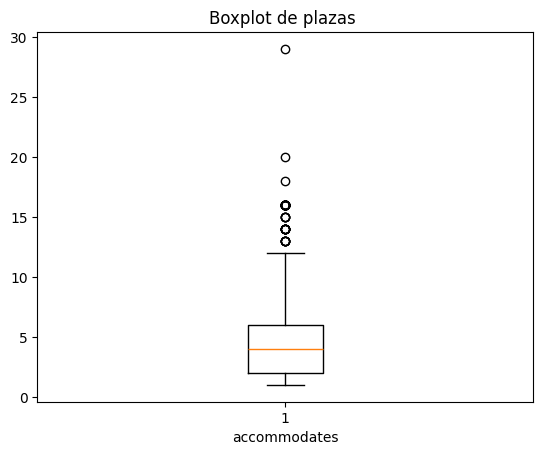

In [ ]:
plt.boxplot(df_op['accommodates'])
plt.title('Boxplot de plazas ')
plt.xlabel('accommodates')
plt.show()

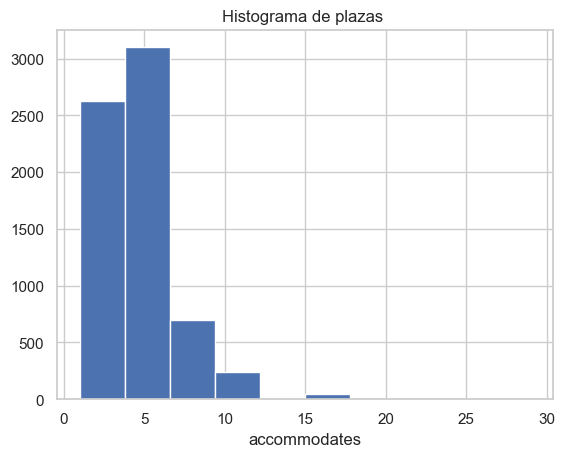

In [ ]:
plt.hist(df_op['accommodates'])
plt.title('Histograma de plazas ')
plt.xlabel('accommodates')
plt.show()

### Boxplots de numero de Camas, Dormitorios y Baños

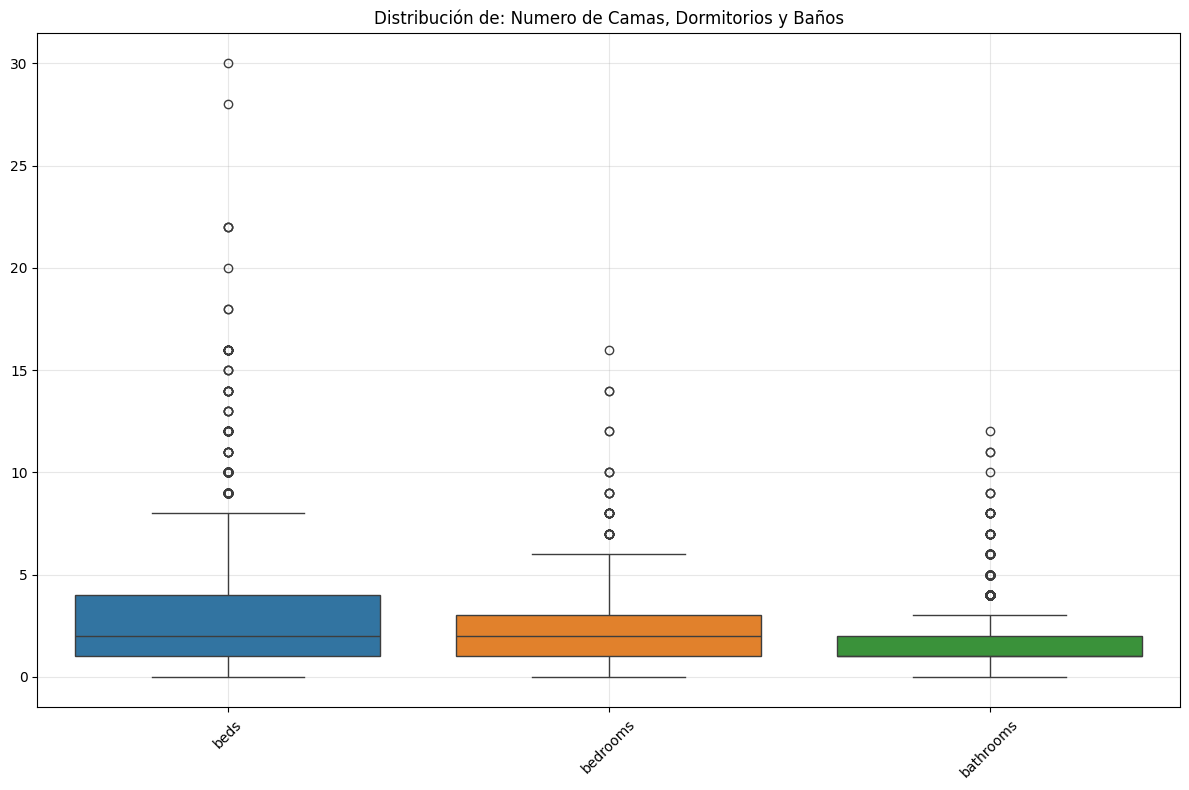

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_op[[ 'beds', 'bedrooms', 'bathrooms']])
plt.title('Distribución de: Numero de Camas, Dormitorios y Baños')
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Histogramas de Camas, Dormitorios y Baños

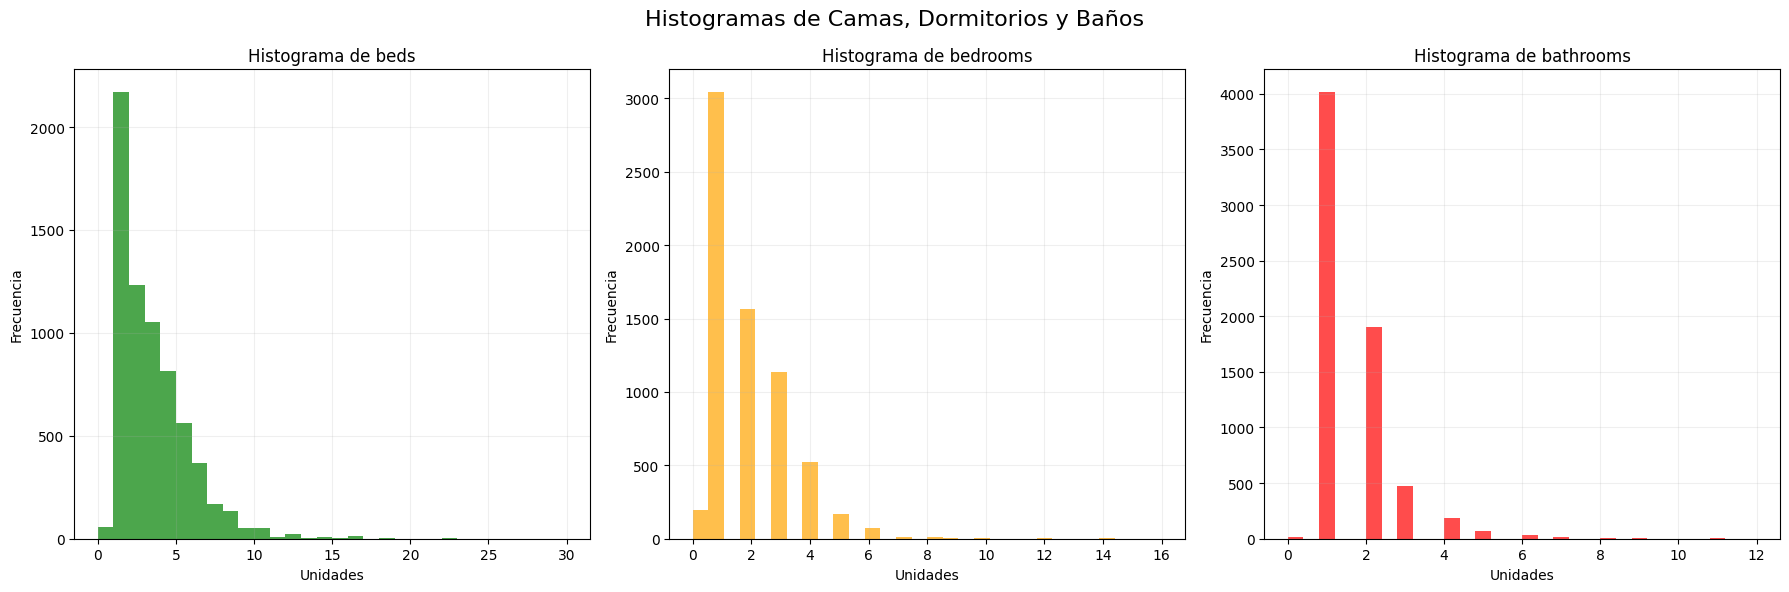

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

variables = ['beds', 'bedrooms', 'bathrooms']
colors = ['green', 'orange', 'red']

for i, var in enumerate(variables):
    ax = axes[i]
    ax.hist(df_op[var], bins=30, color=colors[i], alpha=0.7)
    ax.set_title(f'Histograma de {var}')
    ax.grid(alpha=0.2)
    ax.set_xlabel('Unidades')
    ax.set_ylabel('Frecuencia')

plt.suptitle('Histogramas de Camas, Dormitorios y Baños', fontsize=16)
plt.tight_layout()
plt.show()

### Combrobar distribución normal de las variables

In [ ]:
from scipy.stats import shapiro

# Seleccionar las columnas de interés
columns_to_test = ['accommodates', 'beds', 'bedrooms', 'bathrooms']

# Iterar sobre las columnas y realizar el Shapiro-Wilk Test
for col in columns_to_test:
    stat, p_value = shapiro(df_op[col])
    print(f"{col}: W-statistic = {stat:.4f}, p-value = {p_value:.4f}")

    if p_value < 0.05:
        print(f"La variable {col} no sigue una distribución normal (rechazamos H0)")
    else:
        print(f"La variable {col} sigue una distribución normal (no rechazamos H0)")
    print('-' * 50)

accommodates: W-statistic = 0.8877, p-value = 0.0000
La variable accommodates no sigue una distribución normal (rechazamos H0)
--------------------------------------------------
beds: W-statistic = 0.8044, p-value = 0.0000
La variable beds no sigue una distribución normal (rechazamos H0)
--------------------------------------------------
bedrooms: W-statistic = 0.8110, p-value = 0.0000
La variable bedrooms no sigue una distribución normal (rechazamos H0)
--------------------------------------------------
bathrooms: W-statistic = 0.6440, p-value = 0.0000
La variable bathrooms no sigue una distribución normal (rechazamos H0)
--------------------------------------------------


### Calcular coeficiente de correlación 

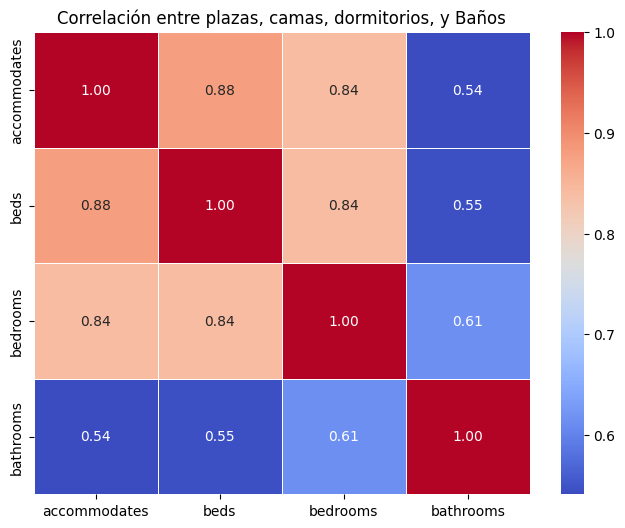

In [ ]:
# Selecciona las columnas numéricas de interés
correlation_columns = ['accommodates', 'beds', 'bedrooms', 'bathrooms']

# Calcula la matriz de correlación
corr_matrix = df_op[correlation_columns].corr(method='spearman')

# Graficar el heatmap de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlación entre plazas, camas, dormitorios, y Baños')
plt.show()

### Distribución por tipo de alojamienmto

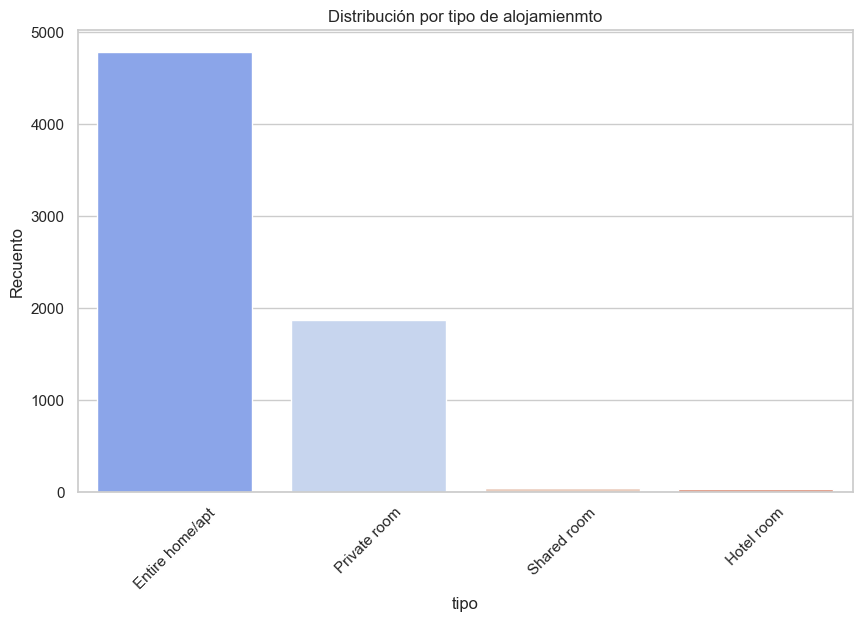

In [ ]:
# Configuración del estilo de Seaborn
sns.set(style="whitegrid")

# Distribución de room_type
plt.figure(figsize=(10, 6))
sns.countplot(data=df_op, x='room_type', palette='coolwarm', order=df_op['room_type'].value_counts().index)
plt.title('Distribución por tipo de alojamienmto')
plt.xticks(rotation=45)
plt.xlabel('tipo')
plt.ylabel('Recuento')
plt.show()

### Comparación de room_type con Variables Numéricas (Boxplot):
ver cómo se distribuyen accommodates, beds y bathrooms por tipo de Alojamiento:


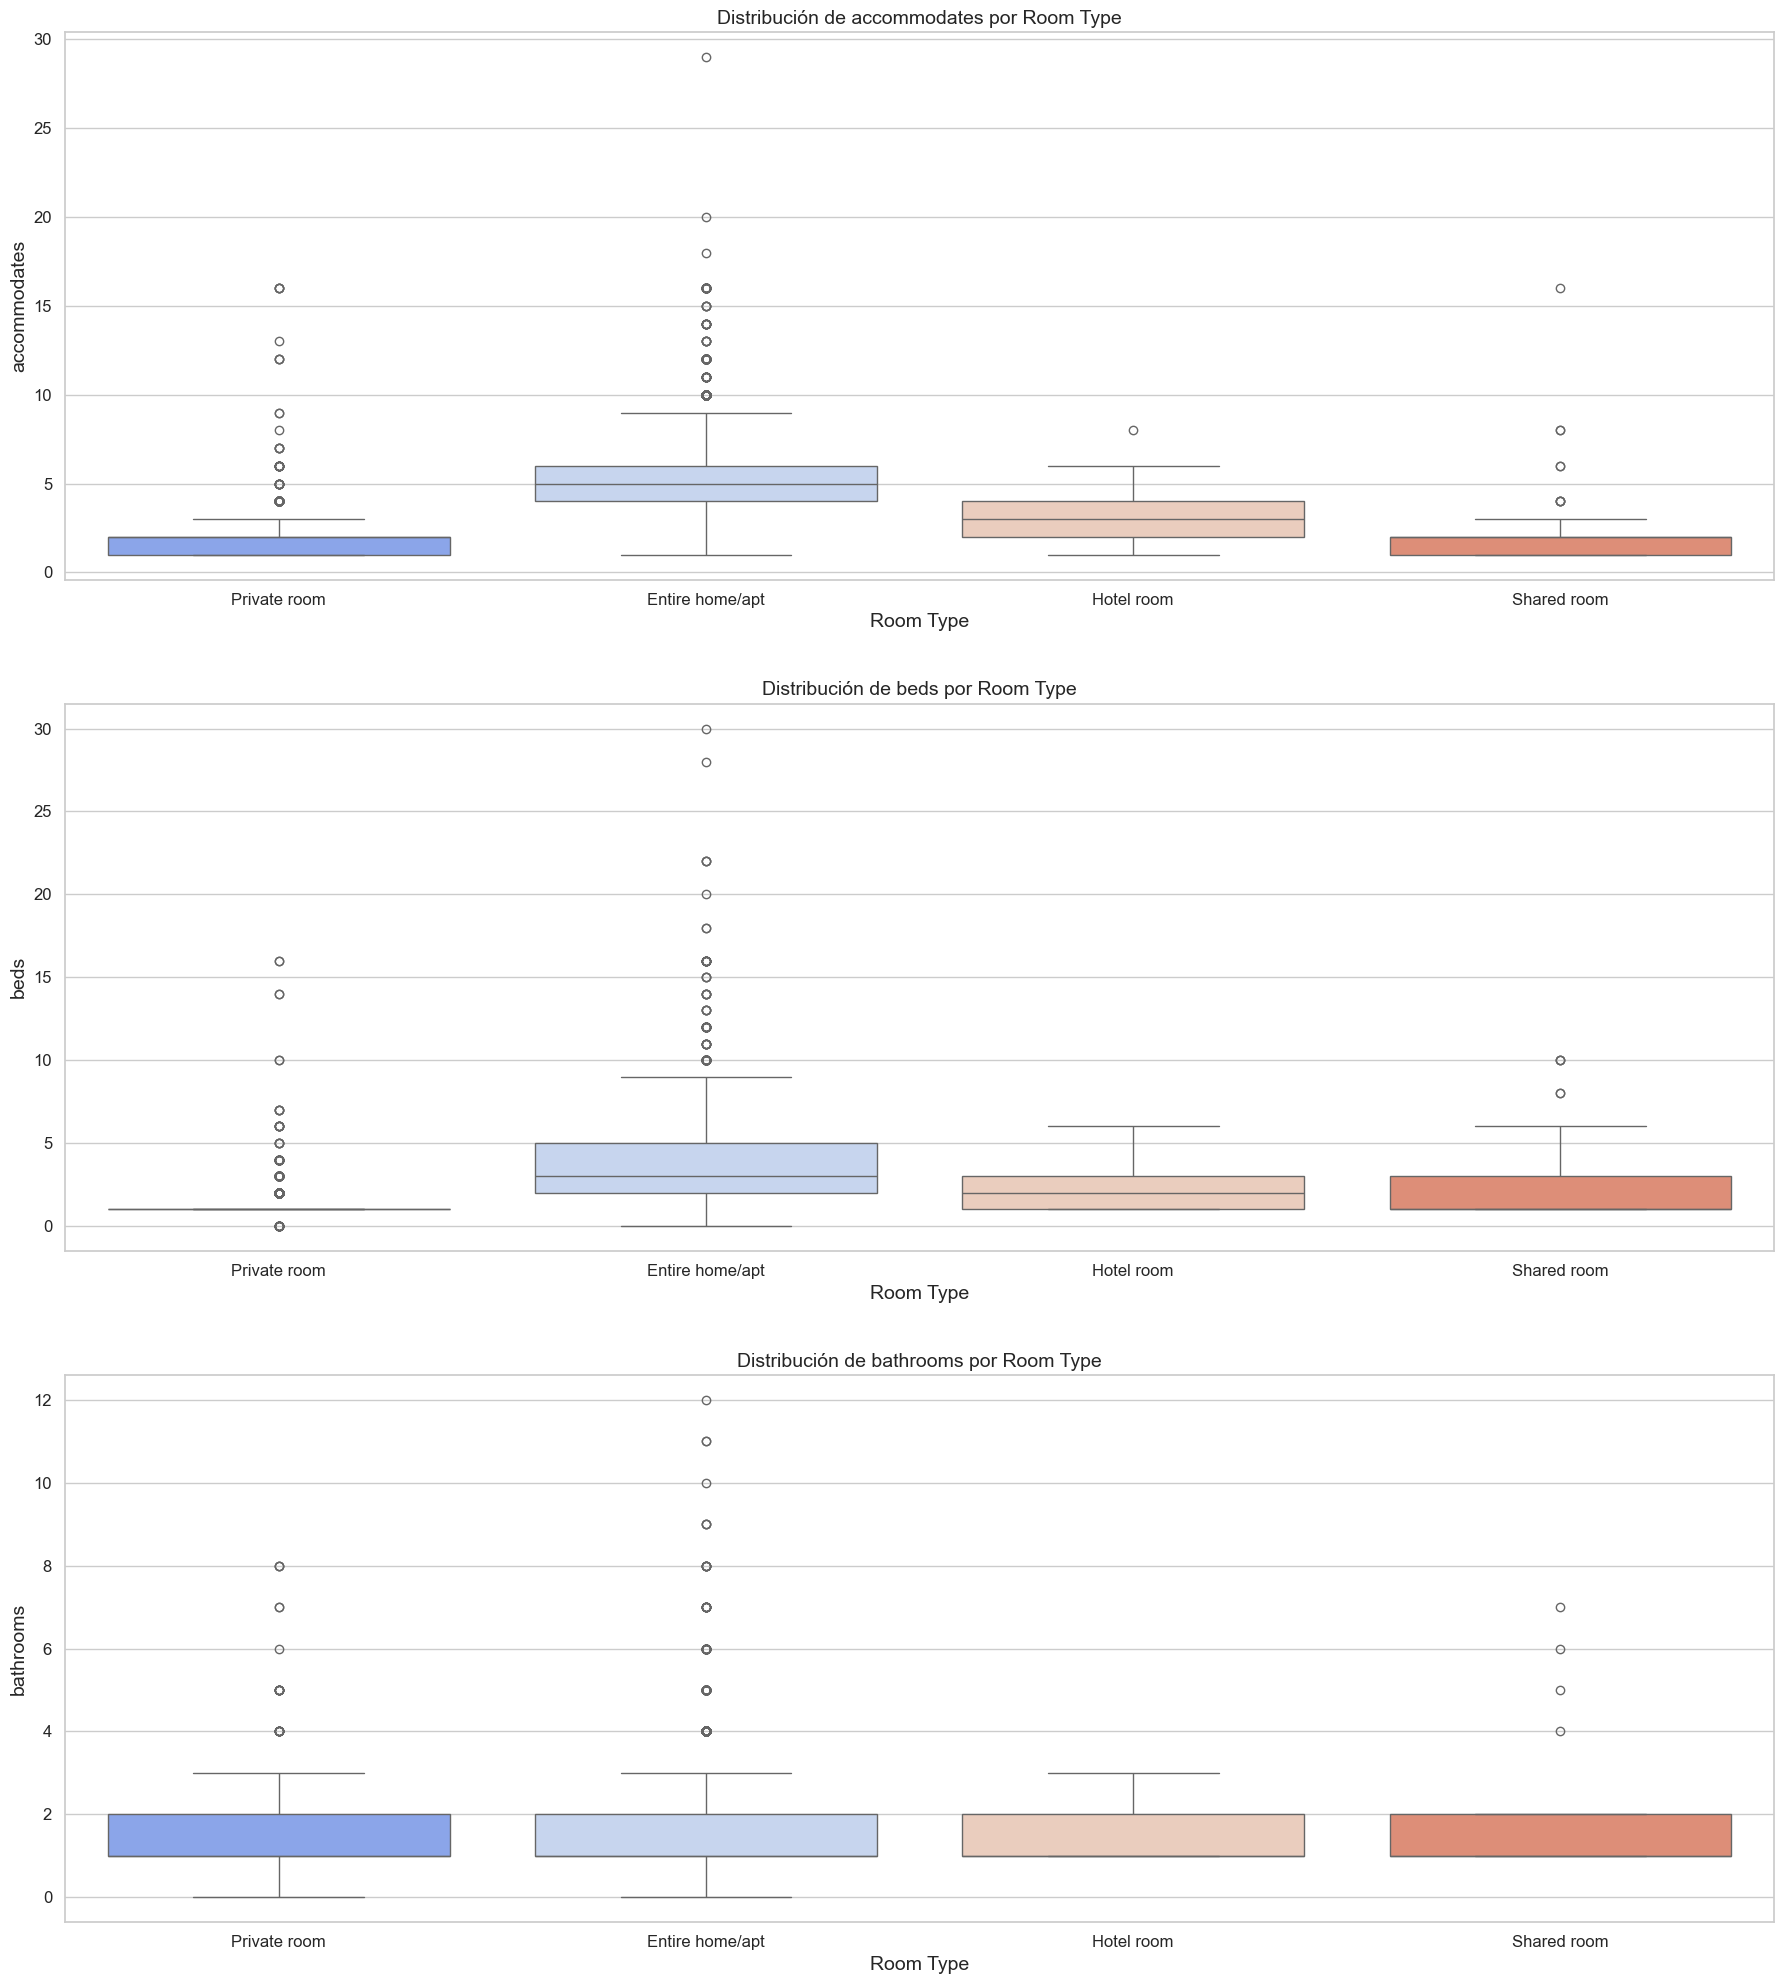

In [ ]:
# Variables numéricas a comparar
num_vars = ['accommodates', 'beds', 'bathrooms']

# Ajuste del tamaño del gráfico 
plt.figure(figsize=(18, 20))  

for i, var in enumerate(num_vars, 1):
    plt.subplot(len(num_vars), 1, i)
    sns.boxplot(data=df_op, x='room_type', y=var, palette='coolwarm')
    plt.title(f'Distribución de {var} por Room Type', fontsize=14)
    plt.xticks(rotation=0, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Room Type', fontsize=14)
    plt.ylabel(var, fontsize=14)
    plt.tight_layout(h_pad=3)  

plt.show()

### Recuento de tipo de alojamiento por ciudad

In [ ]:
# Agrupar por 'city' y 'room_type' para obtener el conteo
room_city_count = df_op.groupby(['city', 'room_type']).size().reset_index(name='count')

# Crear el gráfico de barras apiladas
fig = px.bar(room_city_count, x='city', y='count', color='room_type', 
             title='Recuento de tipo de alojamiento por Ciudad', 
             labels={'city': 'City'}, 
             height=600, barmode='stack')

# Configurar el gráfico
fig.update_layout(xaxis_title='Ciudad', yaxis_title='Conteo', xaxis_tickangle=45)

fig.show()

### Numero de Alojamientos registrados por Día

In [ ]:
# Contar alojamientos por día
alojamientos_por_dia = df_op['insert_date'].dt.date.value_counts().sort_index()

# Crear DataFrame para Plotly
df_dia = alojamientos_por_dia.reset_index()
df_dia.columns = ['Fecha', 'Cantidad']

fig = px.line(df_dia, x='Fecha', y='Cantidad', 
              title='Numero de Alojamientos registrados por Día',
              markers=True,
              template='plotly_dark')
fig.update_layout(xaxis_title='Fecha', yaxis_title='Cantidad de Alojamientos')
fig.show()

### Media de disponibilidad global ( 30/60/90/365)

In [ ]:
media_disp_glob = df_op[['availability_30', 'availability_60', 'availability_90', 'availability_365']].mean().reset_index(name= 'Media_global').round(2)

media_disp_glob 

,index,Media_global
0,availability_30,12.29
1,availability_60,27.42
2,availability_90,44.30
3,availability_365,187.39


### Media de disponibilidad por ciudad ( 30/60/90/365)

In [ ]:
media_disp_ciudad = df_op.groupby('city')[['availability_30', 'availability_60', 'availability_90', 'availability_365']].agg('mean').round(2).reset_index()

media_disp_ciudad 

,city,availability_30,availability_60,availability_90,availability_365
0,barcelona,11.11,25.63,42.50,182.09
1,girona,14.59,31.27,48.35,195.07
2,madrid,10.41,24.12,39.95,163.56
3,malaga,12.14,28.43,47.13,202.65
4,mallorca,13.41,28.70,45.17,210.92
5,menorca,14.99,30.88,47.54,199.49
6,sevilla,14.06,30.92,50.05,199.75
7,valencia,13.59,29.73,47.72,183.75


In [ ]:
# Crear el gráfico de barras
fig = px.bar(media_disp_ciudad , 
             x='city', 
             y=['availability_30', 'availability_60', 'availability_90', 'availability_365'], 
             title='Media de Disponibilidad por Ciudad', 
             labels={'value': 'Media de Disponibilidad', 'city': 'Ciudad'},
             height=600)

# Mostrar el gráfico
fig.show()